In [250]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


In [251]:
df=pd.read_csv('amazon.csv')

In [252]:
df['reviewText'].values[30]

"This item is great!  I can't believe how small it is.  Imagine 64gb this size back in the 70's when they had whole buildings full of computers that couldn't pack this much space!  Great item."

In [253]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [254]:
df.head()


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


Text(0, 0.5, 'count')

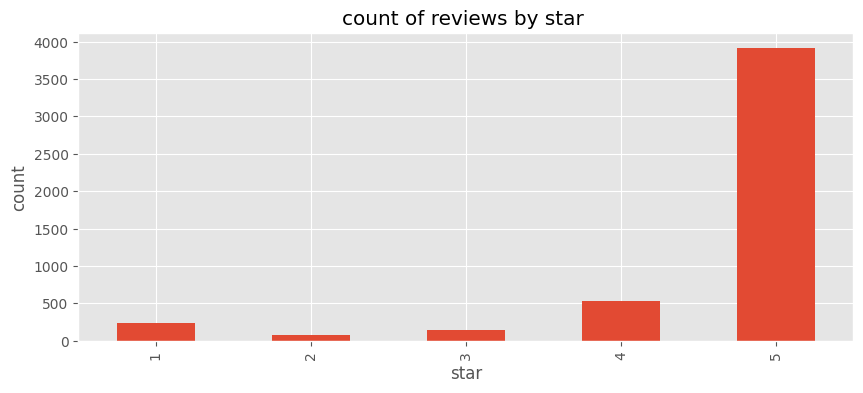

In [255]:
ax=df['overall'].value_counts().sort_index().plot(kind='bar',title='count of reviews by star ', figsize=(10,4))
ax.set_xlabel('star')
ax.set_ylabel('count')

In [256]:
example = df['reviewText'][50]
print(example)

A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


In [257]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['A', 'memory', 'card', 'either', 'works', 'or', 'it', 'does', "n't", '.']

In [258]:
tagged=nltk.pos_tag(tokens)
tagged[:5]

[('A', 'DT'),
 ('memory', 'NN'),
 ('card', 'NN'),
 ('either', 'CC'),
 ('works', 'VBZ')]

In [259]:
entities=nltk.chunk.ne_chunk(tagged)

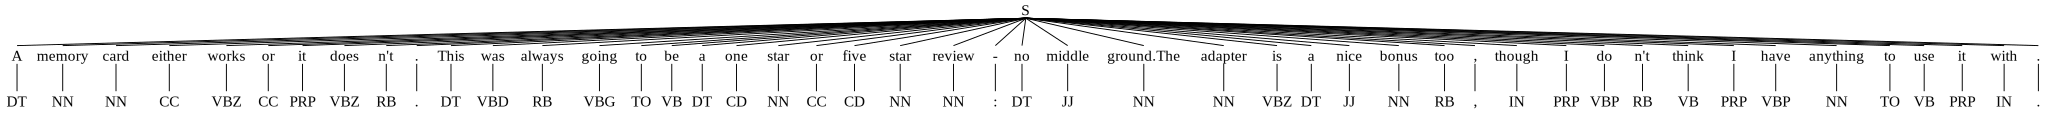

In [260]:
entities

In [261]:
# vader

In [262]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [263]:
sia = SentimentIntensityAnalyzer()


In [264]:
sia.polarity_scores('i am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [265]:
# run the polarity socre in entire data set

In [266]:
res = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    if isinstance(index, float):
        res[index] = str(index)
    text = str(row['reviewText'])  # Convert text to string explicitly
    myid = row['Unnamed: 0']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4915 [00:00<?, ?it/s]

In [267]:
res

{0: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296},
 1: {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.296},
 2: {'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.3089},
 3: {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.7081},
 4: {'neg': 0.038, 'neu': 0.835, 'pos': 0.127, 'compound': 0.7087},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.063, 'neu': 0.745, 'pos': 0.192, 'compound': 0.8992},
 7: {'neg': 0.044, 'neu': 0.833, 'pos': 0.123, 'compound': 0.7768},
 8: {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.296},
 9: {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9167},
 10: {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9258},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.058, 'neu': 0.716, 'pos': 0.225, 'compound': 0.7425},
 14: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4295},
 15: {'neg': 0.057,

In [268]:
vader= pd.DataFrame(res).T
vader.reset_index().rename(columns={'index':'ID'})


,ID,neg,neu,pos,compound
0,0,0.688,0.312,0.000,-0.2960
1,1,0.075,0.925,0.000,-0.2960
2,2,0.077,0.923,0.000,-0.3089
3,3,0.000,0.909,0.091,0.7081
4,4,0.038,0.835,0.127,0.7087
...,...,...,...,...,...
4910,4910,0.091,0.817,0.092,0.0018
4911,4911,0.000,0.939,0.061,0.1761
4912,4912,0.000,0.828,0.172,0.8588
4913,4913,0.000,0.802,0.198,0.4939


In [269]:
vader = vader.merge(df, how='left', left_index=True, right_index=True)
vader


,neg,neu,pos,compound,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0.688,0.312,0.000,-0.2960,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0.075,0.925,0.000,-0.2960,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,0.077,0.923,0.000,-0.3089,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,0.000,0.909,0.091,0.7081,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,0.038,0.835,0.127,0.7087,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0.091,0.817,0.092,0.0018,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,0.000,0.939,0.061,0.1761,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,0.000,0.828,0.172,0.8588,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,0.000,0.802,0.198,0.4939,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [270]:
vader.head()

,neg,neu,pos,compound,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0.688,0.312,0.000,-0.2960,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0.075,0.925,0.000,-0.2960,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,0.077,0.923,0.000,-0.3089,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,0.000,0.909,0.091,0.7081,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,0.038,0.835,0.127,0.7087,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


Text(0.5, 1.0, 'compund_score by star')

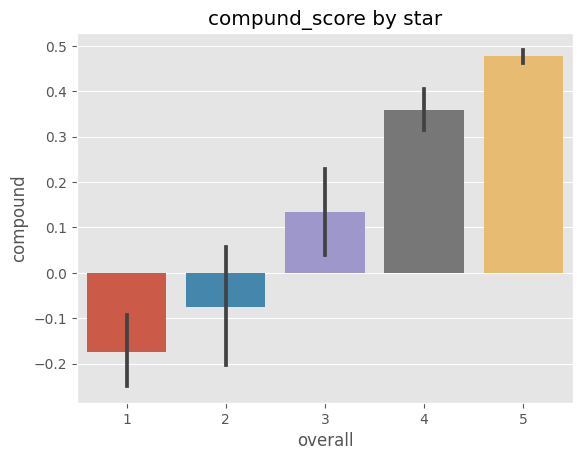

In [271]:
ax=sns.barplot(data=vader,x='overall',y='compound')
ax.set_title('compund_score by star')

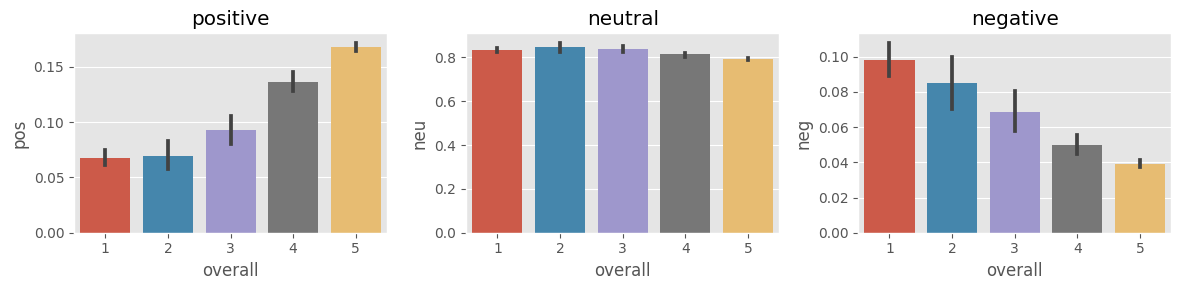

In [272]:
fig, axs = plt.subplots(1,3 , figsize=(12,3))
sns.barplot(data=vader,x='overall',y='pos', ax=axs[0])
sns.barplot(data=vader,x='overall',y='neu',ax=axs[1])
sns.barplot(data=vader,x='overall',y='neg',ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('neutral')
axs[2].set_title('negative')
plt.tight_layout()
plt.show()
